# Analysis of programming languages over time using Stack Overflow data

##Overview
This notebook analyzes the popularity trends of various programming languages over time using Stack Overflow data. The analysis covers data exploration, cleaning, visualization, and insights into programming language trends from 2008 to 2020.



## Data Collection

The data is obtained from StackExchange (Stack Overflow) using a SQL query that counts monthly posts per programming language tag. The dataset includes popular programming languages such as Java, C, C++, Python, C#, JavaScript, and others.

## Import Statements

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Exploration

In [7]:
data=pd.read_csv('/content/QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)
print(data.head())
print(data.tail())
print(data.shape)

                  DATE         TAG  POSTS
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    162
3  2008-08-01 00:00:00           c     85
4  2008-08-01 00:00:00      python    124
                     DATE    TAG  POSTS
1986  2020-07-01 00:00:00      r   5694
1987  2020-07-01 00:00:00     go    743
1988  2020-07-01 00:00:00   ruby    775
1989  2020-07-01 00:00:00   perl    182
1990  2020-07-01 00:00:00  swift   3607
(1991, 3)


##Data Summary Statistics


In [8]:
print("Count of entries per column:")
print(data.count())

print("\nSummary statistics for POSTS:")
print(data['POSTS'].describe())

print("\nMissing values per column:")
print(data.isnull().sum())

Count of entries per column:
DATE     1991
TAG      1991
POSTS    1991
dtype: int64

Summary statistics for POSTS:
count     1991.000000
mean      5069.401306
std       6065.055196
min          1.000000
25%        426.500000
50%       2472.000000
75%       8163.000000
max      34478.000000
Name: POSTS, dtype: float64

Missing values per column:
DATE     0
TAG      0
POSTS    0
dtype: int64


##Language Analysis


In [9]:
print("Total posts per programming language:")
total_posts_per_language = data.groupby('TAG')['POSTS'].sum().sort_values(ascending=False)
print(total_posts_per_language)

print("\nNumber of months with entries per language:")
months_per_language = data.groupby('TAG')['DATE'].count().sort_values()
print(months_per_language)

print(f"\nLanguage with fewest months: {months_per_language.index[0]} ({months_per_language.iloc[0]} months)")

Total posts per programming language:
TAG
javascript    2056510
java          1696403
python        1496210
c#            1423530
php           1361988
c++            684210
r              356799
c              336042
swift          273055
ruby           214582
perl            65286
go              47499
delphi          46212
assembly        34852
Name: POSTS, dtype: int64

Number of months with entries per language:
TAG
go            129
swift         135
r             142
assembly      144
java          144
delphi        144
c++           144
c             144
python        144
javascript    144
php           144
perl          144
ruby          144
c#            145
Name: DATE, dtype: int64

Language with fewest months: go (129 months)


## Data Cleaning


In [12]:
data['DATE'] = pd.to_datetime(data['DATE'])
print("Date conversion completed")
print(data.head())

Date conversion completed
        DATE         TAG  POSTS
0 2008-07-01          c#      3
1 2008-08-01    assembly      8
2 2008-08-01  javascript    162
3 2008-08-01           c     85
4 2008-08-01      python    124


##Data Validation


In [13]:
print(f"Date range: {data['DATE'].min()} to {data['DATE'].max()}")
print(f"Total time span: {(data['DATE'].max() - data['DATE'].min()).days} days")

print(f"\nUnique programming languages: {data['TAG'].nunique()}")
print(f"Languages: {list(data['TAG'].unique())}")

Date range: 2008-07-01 00:00:00 to 2020-07-01 00:00:00
Total time span: 4383 days

Unique programming languages: 14
Languages: ['c#', 'assembly', 'javascript', 'c', 'python', 'perl', 'c++', 'java', 'delphi', 'ruby', 'php', 'r', 'swift', 'go']


##  Data Transformation



In [14]:
pivoted_df = data.pivot(index='DATE', columns='TAG', values='POSTS')
print(f"Pivoted dataframe shape: {pivoted_df.shape}")
print(f"Columns: {list(pivoted_df.columns)}")

print("\nFirst 5 rows of pivoted data:")
print(pivoted_df.head())

Pivoted dataframe shape: (145, 14)
Columns: ['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript', 'perl', 'php', 'python', 'r', 'ruby', 'swift']

First 5 rows of pivoted data:
TAG         assembly      c      c#    c++  delphi  go    java  javascript  \
DATE                                                                         
2008-07-01       NaN    NaN     3.0    NaN     NaN NaN     NaN         NaN   
2008-08-01       8.0   85.0   511.0  164.0    14.0 NaN   222.0       162.0   
2008-09-01      28.0  321.0  1649.0  755.0   105.0 NaN  1137.0       640.0   
2008-10-01      15.0  303.0  1989.0  811.0   112.0 NaN  1153.0       725.0   
2008-11-01      17.0  259.0  1730.0  735.0   141.0 NaN   958.0       579.0   

TAG          perl    php  python    r   ruby  swift  
DATE                                                 
2008-07-01    NaN    NaN     NaN  NaN    NaN    NaN  
2008-08-01   28.0  161.0   124.0  NaN   73.0    NaN  
2008-09-01  131.0  482.0   542.0  6.0  290.0  

In [15]:
print("Number of monthly entries per language:")
print(pivoted_df.count().sort_values())

pivoted_df.fillna(0, inplace=True)
print("\nAfter filling NaN values:")
print(f"Any remaining NaN values: {pivoted_df.isna().values.any()}")

print(f"\nPivoted dataframe info:")
print(pivoted_df.info())

Number of monthly entries per language:
TAG
go            129
swift         135
r             142
assembly      144
java          144
delphi        144
c++           144
c             144
python        144
javascript    144
php           144
perl          144
ruby          144
c#            145
dtype: int64

After filling NaN values:
Any remaining NaN values: False

Pivoted dataframe info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145 entries, 2008-07-01 to 2020-07-01
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   assembly    145 non-null    float64
 1   c           145 non-null    float64
 2   c#          145 non-null    float64
 3   c++         145 non-null    float64
 4   delphi      145 non-null    float64
 5   go          145 non-null    float64
 6   java        145 non-null    float64
 7   javascript  145 non-null    float64
 8   perl        145 non-null    float64
 9   php         145 non-null   

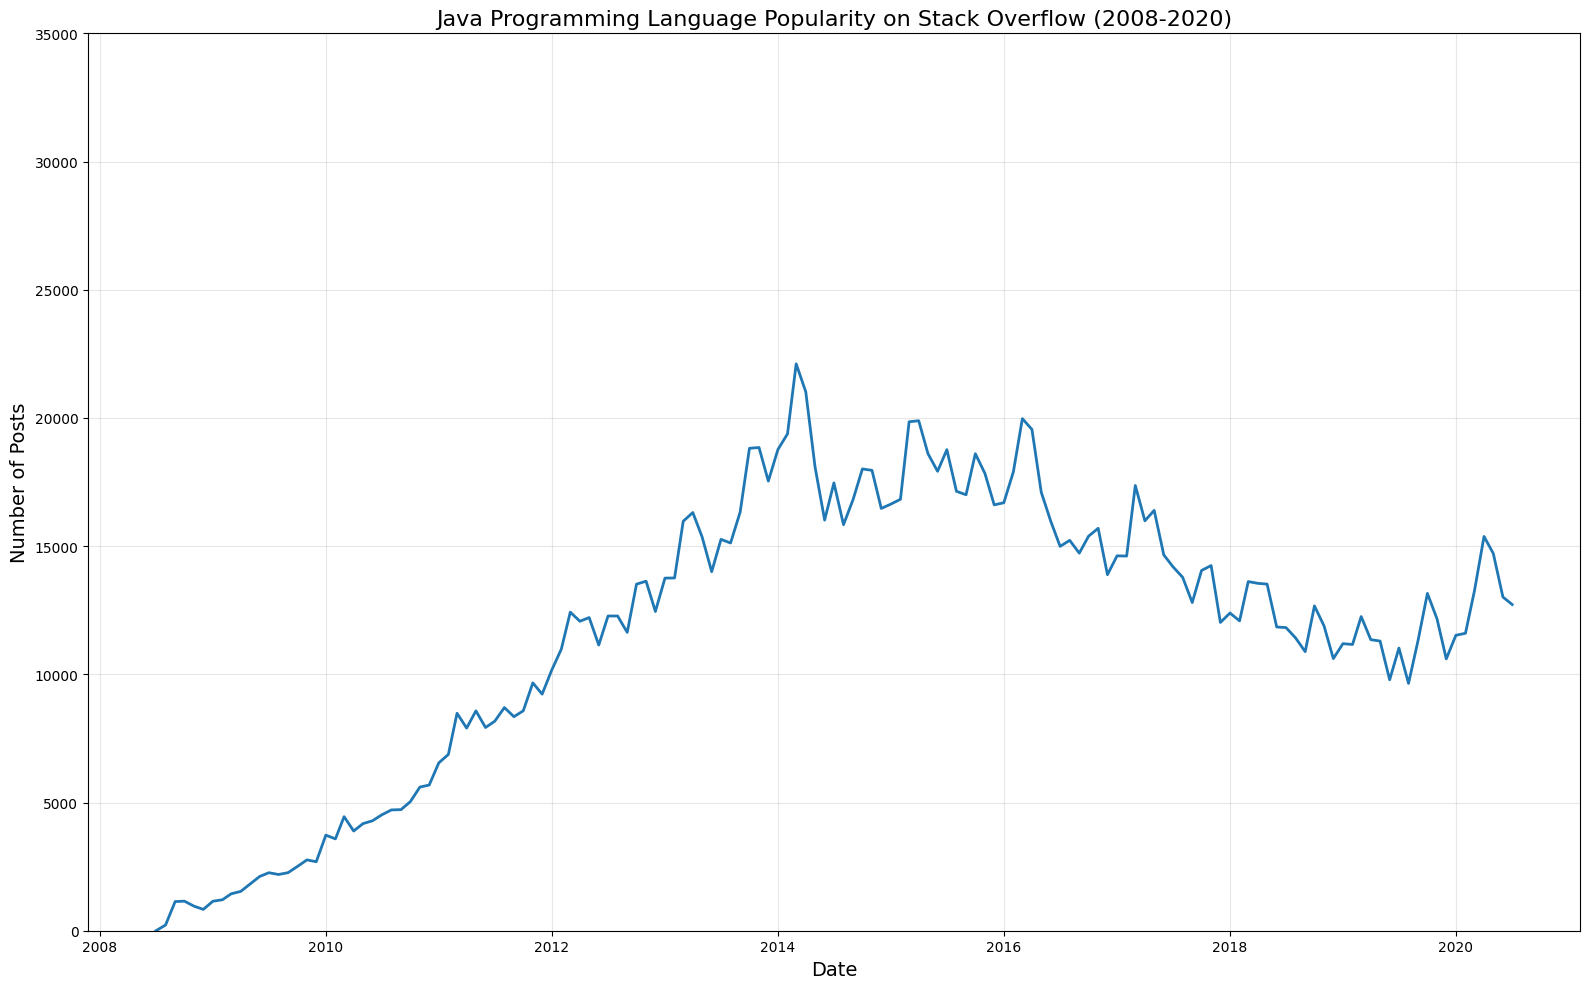

In [16]:
plt.figure(figsize=(16, 10))
plt.plot(pivoted_df.index, pivoted_df['java'], linewidth=2)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.title('Java Programming Language Popularity on Stack Overflow (2008-2020)', fontsize=16)
plt.ylim(0, 35000)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

##Multiple Language Comparison

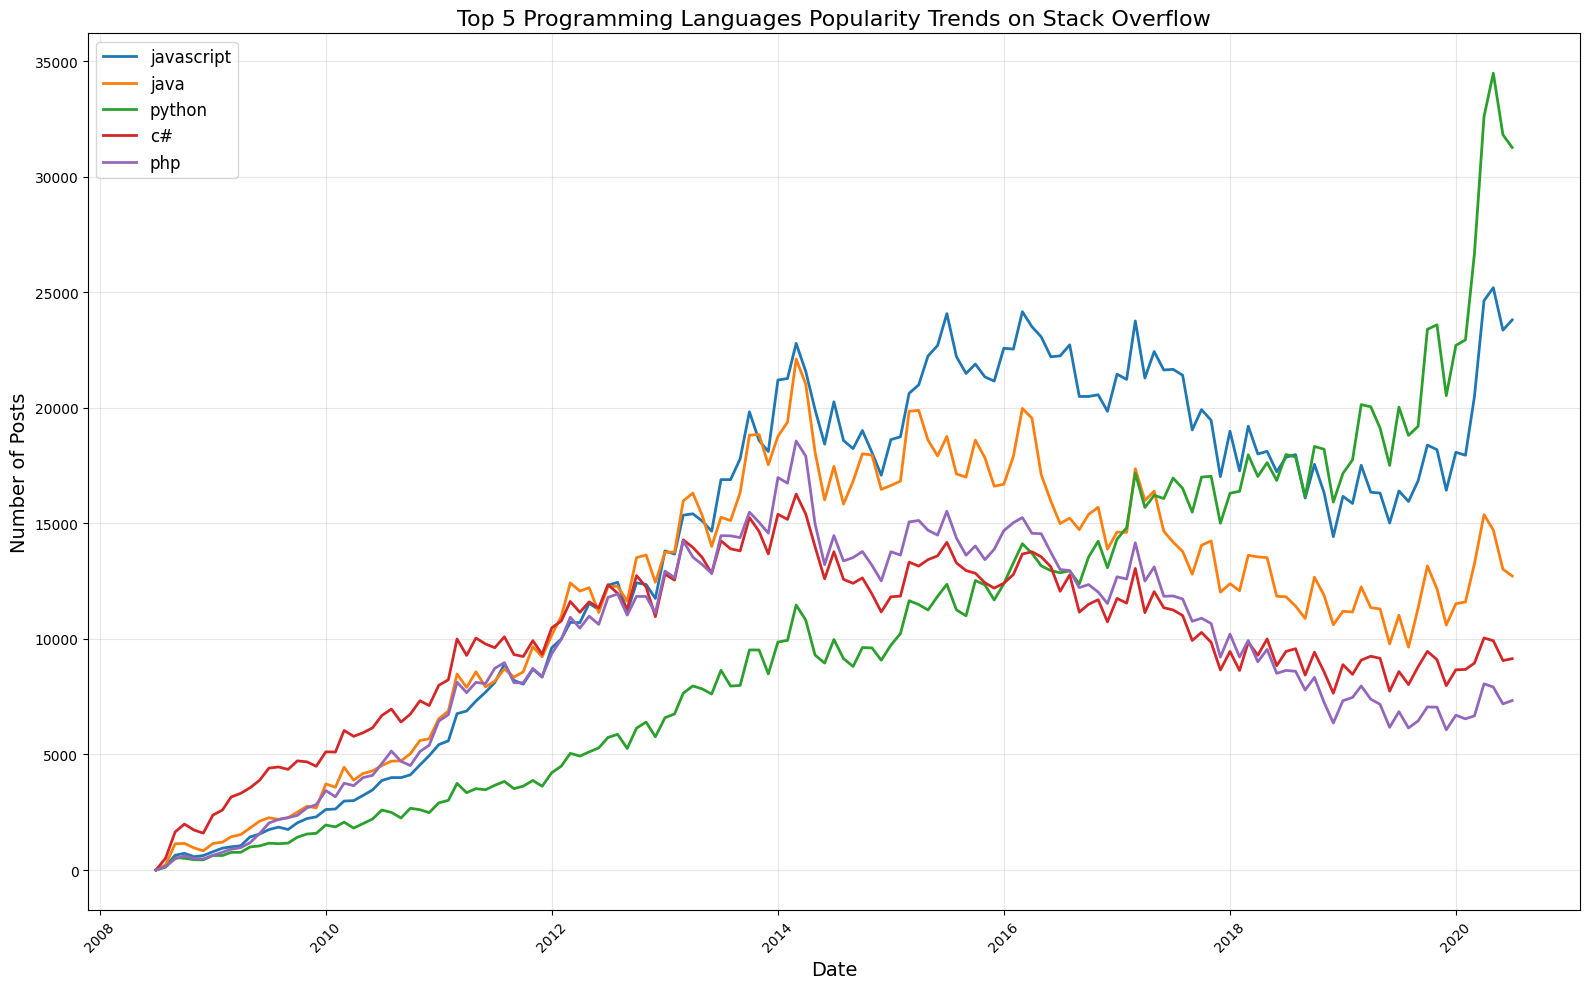

In [17]:
top_languages = total_posts_per_language.head(5).index

plt.figure(figsize=(16, 10))
for language in top_languages:
    plt.plot(pivoted_df.index, pivoted_df[language], linewidth=2, label=language)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.title('Top 5 Programming Languages Popularity Trends on Stack Overflow', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Growth Rate Analysis


/tmp/ipython-input-990474989.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg = pivoted_df[language].resample('Y').mean()


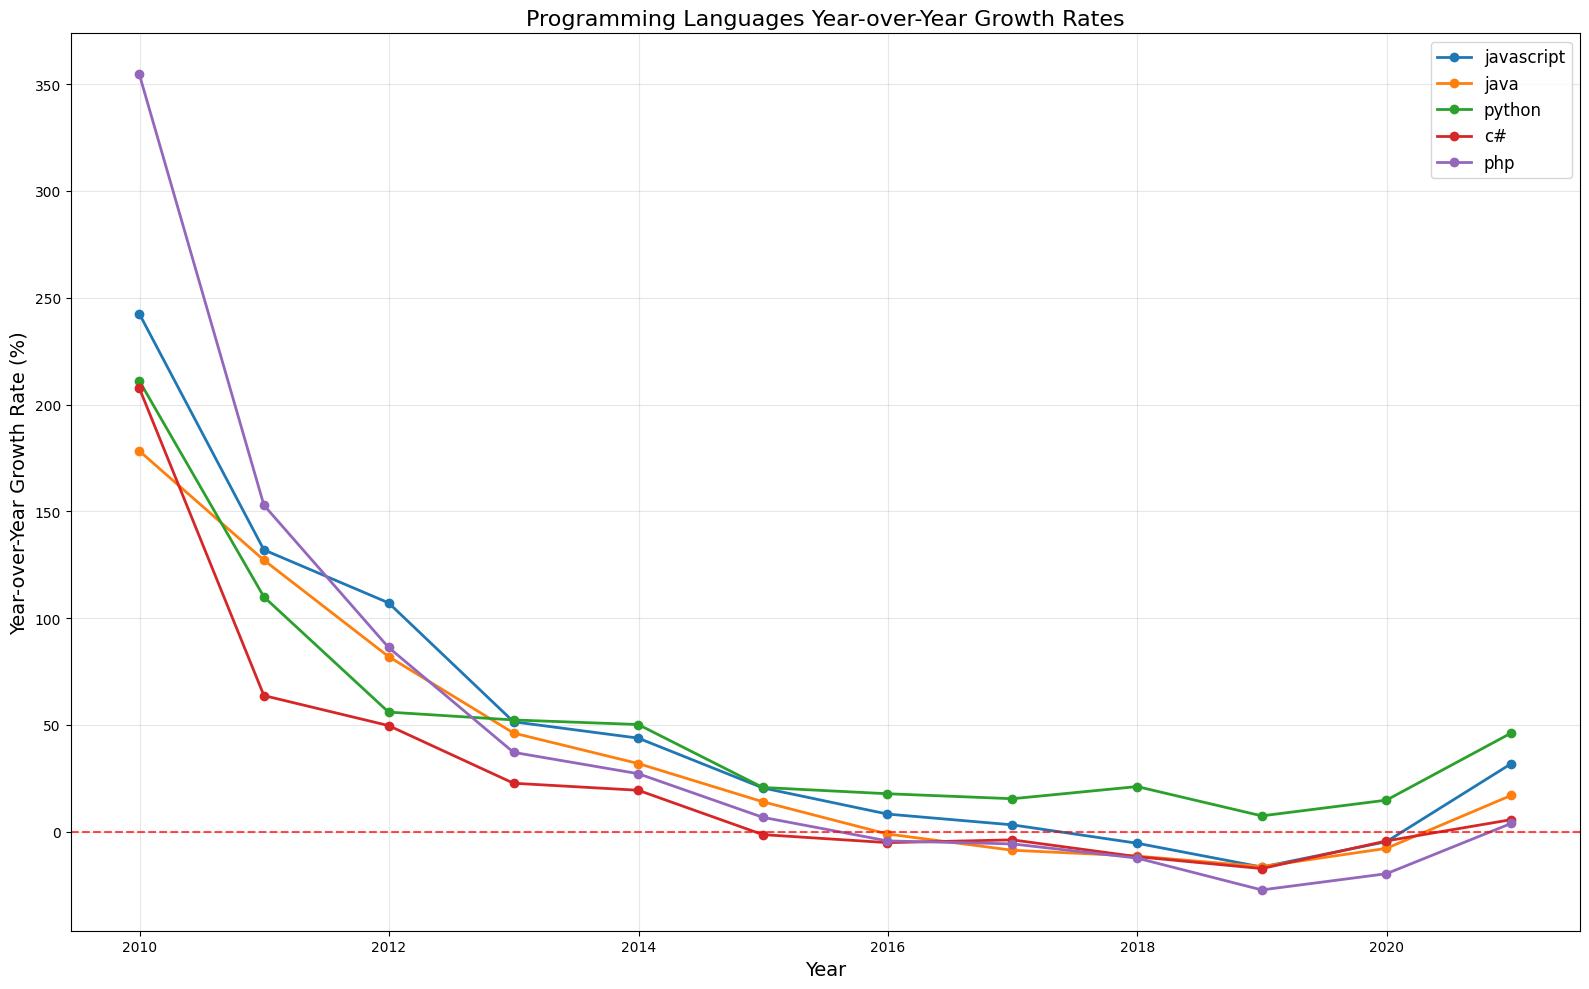

In [18]:
plt.figure(figsize=(16, 10))

for language in top_languages:
    # Calculate year-over-year growth
    yearly_avg = pivoted_df[language].resample('Y').mean()
    growth_rate = yearly_avg.pct_change() * 100
    plt.plot(growth_rate.index, growth_rate, marker='o', linewidth=2, label=language)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Year-over-Year Growth Rate (%)', fontsize=14)
plt.title('Programming Languages Year-over-Year Growth Rates', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##Market Share Analysis


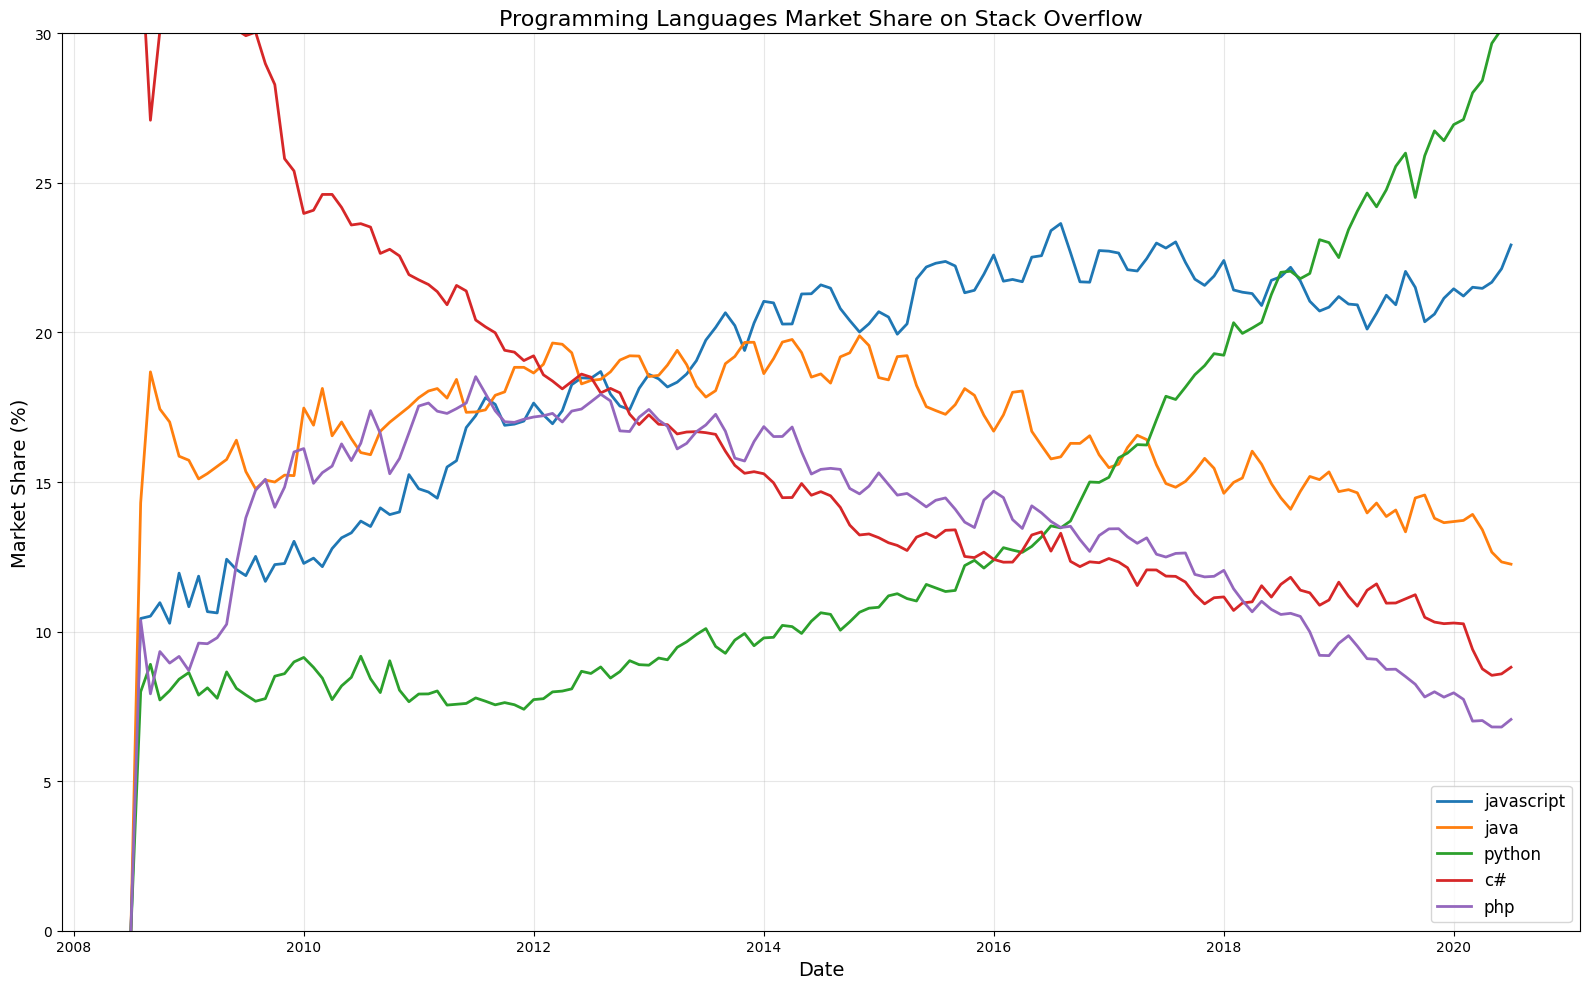

In [19]:
monthly_totals = pivoted_df.sum(axis=1)
market_share = pivoted_df.div(monthly_totals, axis=0) * 100

plt.figure(figsize=(16, 10))
for language in top_languages:
    plt.plot(market_share.index, market_share[language], linewidth=2, label=language)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Market Share (%)', fontsize=14)
plt.title('Programming Languages Market Share on Stack Overflow', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.ylim(0, 30)
plt.tight_layout()
plt.show()

##Advanced Analysis

###Language Categories Analysis


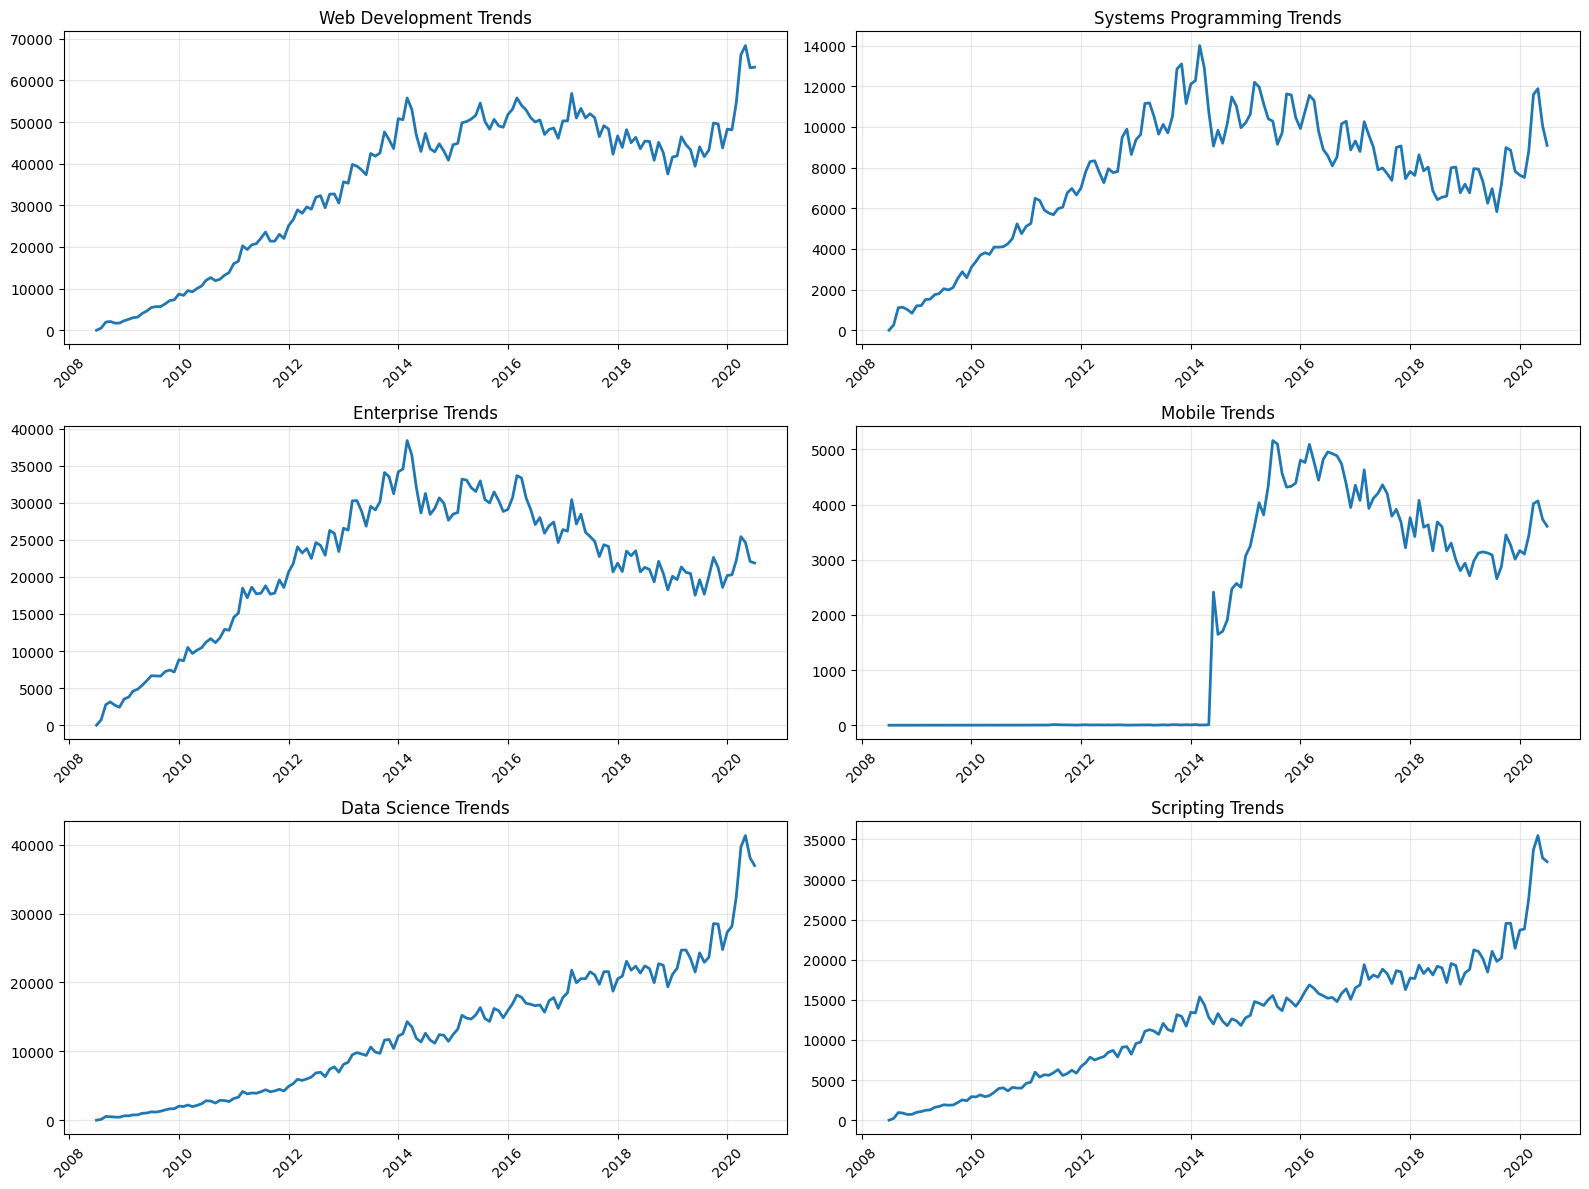

In [20]:
language_categories = {
    'Web Development': ['javascript', 'php', 'ruby', 'python'],
    'Systems Programming': ['c', 'c++', 'go', 'rust', 'assembly'],
    'Enterprise': ['java', 'c#'],
    'Mobile': ['swift', 'kotlin'],
    'Data Science': ['python', 'r'],
    'Scripting': ['perl', 'python', 'ruby']
}


plt.figure(figsize=(16, 12))

for i, (category, languages) in enumerate(language_categories.items(), 1):
    existing_langs = [lang for lang in languages if lang in pivoted_df.columns]
    if existing_langs:
        category_totals = pivoted_df[existing_langs].sum(axis=1)
        plt.subplot(3, 2, i)
        plt.plot(category_totals.index, category_totals, linewidth=2)
        plt.title(f'{category} Trends', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

###Seasonal Analysis


<Figure size 1600x800 with 0 Axes>

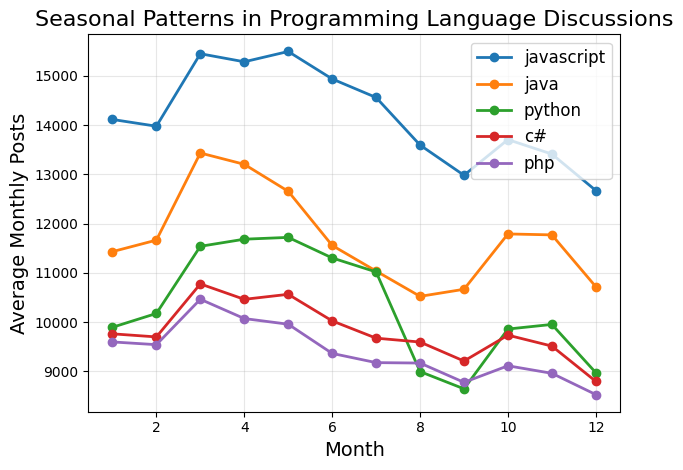

In [21]:
pivoted_df['Year'] = pivoted_df.index.year
pivoted_df['Month'] = pivoted_df.index.month

monthly_patterns = pivoted_df.groupby('Month')[top_languages].mean()

plt.figure(figsize=(16, 8))
monthly_patterns.plot(kind='line', marker='o', linewidth=2)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Monthly Posts', fontsize=14)
plt.title('Seasonal Patterns in Programming Language Discussions', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Key Insights and **Findings**




###Summary Statistics


In [22]:
print("=== PROGRAMMING LANGUAGES ANALYSIS SUMMARY ===")
print(f"Analysis Period: {pivoted_df.index.min().strftime('%Y-%m')} to {pivoted_df.index.max().strftime('%Y-%m')}")
print(f"Total Months Analyzed: {len(pivoted_df)}")
print(f"Languages Tracked: {len(pivoted_df.columns)}")

print("\n--- Top 5 Languages by Total Posts ---")
for i, (lang, posts) in enumerate(total_posts_per_language.head().items(), 1):
    print(f"{i}. {lang}: {posts:,} posts")

print("\n--- Fastest Growing Languages (Last 3 Years) ---")
recent_data = pivoted_df.last('3Y')
growth_rates = (recent_data.iloc[-1] - recent_data.iloc[0]) / recent_data.iloc[0] * 100
fastest_growing = growth_rates.nlargest(5)
for lang, growth in fastest_growing.items():
    print(f"{lang}: {growth:.1f}% growth")

=== PROGRAMMING LANGUAGES ANALYSIS SUMMARY ===
Analysis Period: 2008-07 to 2020-07
Total Months Analyzed: 145
Languages Tracked: 16

--- Top 5 Languages by Total Posts ---
1. javascript: 2,056,510 posts
2. java: 1,696,403 posts
3. python: 1,496,210 posts
4. c#: 1,423,530 posts
5. php: 1,361,988 posts

--- Fastest Growing Languages (Last 3 Years) ---
Month: 600.0% growth
python: 91.8% growth
go: 36.3% growth
r: 35.3% growth
javascript: 25.4% growth


/tmp/ipython-input-953657883.py:11: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = pivoted_df.last('3Y')
/tmp/ipython-input-953657883.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  recent_data = pivoted_df.last('3Y')


In [41]:

def calculate_correlations(pivoted_df):
    """Analyze how language popularities correlate with each other"""
    correlation_matrix = pivoted_df.corr()

    plt.figure(figsize=(12, 10))
    plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.title('Programming Language Popularity Correlations')
    plt.show()

    return correlation_matrix

def forecast_trends(pivoted_df, language, periods=12):
    """Simple trend forecasting using moving averages"""
    data = pivoted_df[language]

    # Calculate moving averages
    short_ma = data.rolling(window=6).mean()  # 6-month MA
    long_ma = data.rolling(window=12).mean()  # 12-month MA

    plt.figure(figsize=(6, 6))
    plt.plot(data.index, data, label='Actual', alpha=0.7)
    plt.plot(short_ma.index, short_ma, label='6-Month MA', linewidth=2)
    plt.plot(long_ma.index, long_ma, label='12-Month MA', linewidth=2)
    plt.title(f'{language} Trend Analysis with Moving Averages')
    plt.legend()
    plt.show()

Analyzing correlations between programming languages...


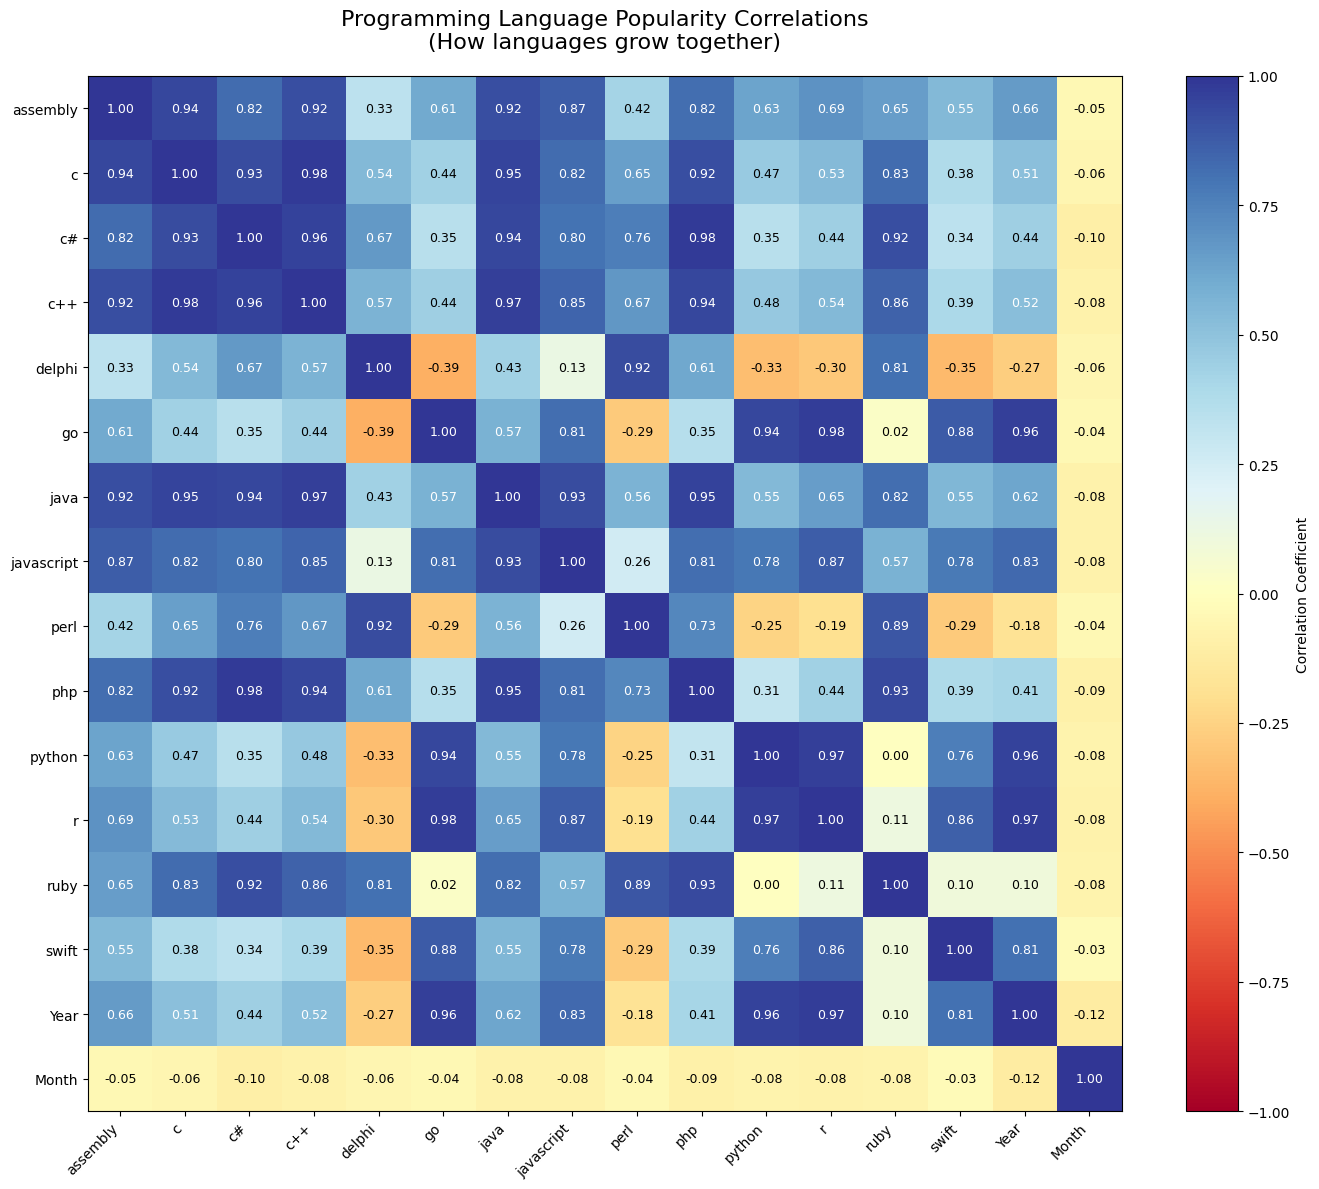

🔍 KEY CORRELATION INSIGHTS:
• c & c++: 0.982 (grow together)
• c# & php: 0.977 (grow together)
• go & r: 0.975 (grow together)
• r & Year: 0.969 (grow together)
• python & r: 0.969 (grow together)


In [42]:
## 7. Advanced Statistical Analysis

### Language Correlation Analysis
def analyze_language_correlations(pivoted_df):
    """Analyze how programming language popularities correlate with each other"""
    # Calculate correlation matrix
    correlation_matrix = pivoted_df.corr()

    # Create visualization
    plt.figure(figsize=(14, 12))
    plt.imshow(correlation_matrix, cmap='RdYlBu', aspect='auto', vmin=-1, vmax=1)
    plt.colorbar(label='Correlation Coefficient')
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.title('Programming Language Popularity Correlations\n(How languages grow together)', fontsize=16, pad=20)

    # Add correlation values as text
    for i in range(len(correlation_matrix.columns)):
        for j in range(len(correlation_matrix.columns)):
            plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                    ha='center', va='center', fontsize=9,
                    color='white' if abs(correlation_matrix.iloc[i, j]) > 0.5 else 'black')

    plt.tight_layout()
    plt.show()

    # Print key insights
    print("🔍 KEY CORRELATION INSIGHTS:")
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr = correlation_matrix.iloc[i, j]
            if abs(corr) > 0.7:  # Strong correlation
                high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr))

    for lang1, lang2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)[:5]:
        relationship = "grow together" if corr > 0 else "move oppositely"
        print(f"• {lang1} & {lang2}: {corr:.3f} ({relationship})")

    return correlation_matrix

# Execute the correlation analysis
print("Analyzing correlations between programming languages...")
correlation_results = analyze_language_correlations(pivoted_df)

Performing advanced trend analysis...


/tmp/ipython-input-2188513695.py:21: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = data.last('2Y')
/tmp/ipython-input-2188513695.py:21: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  recent_data = data.last('2Y')


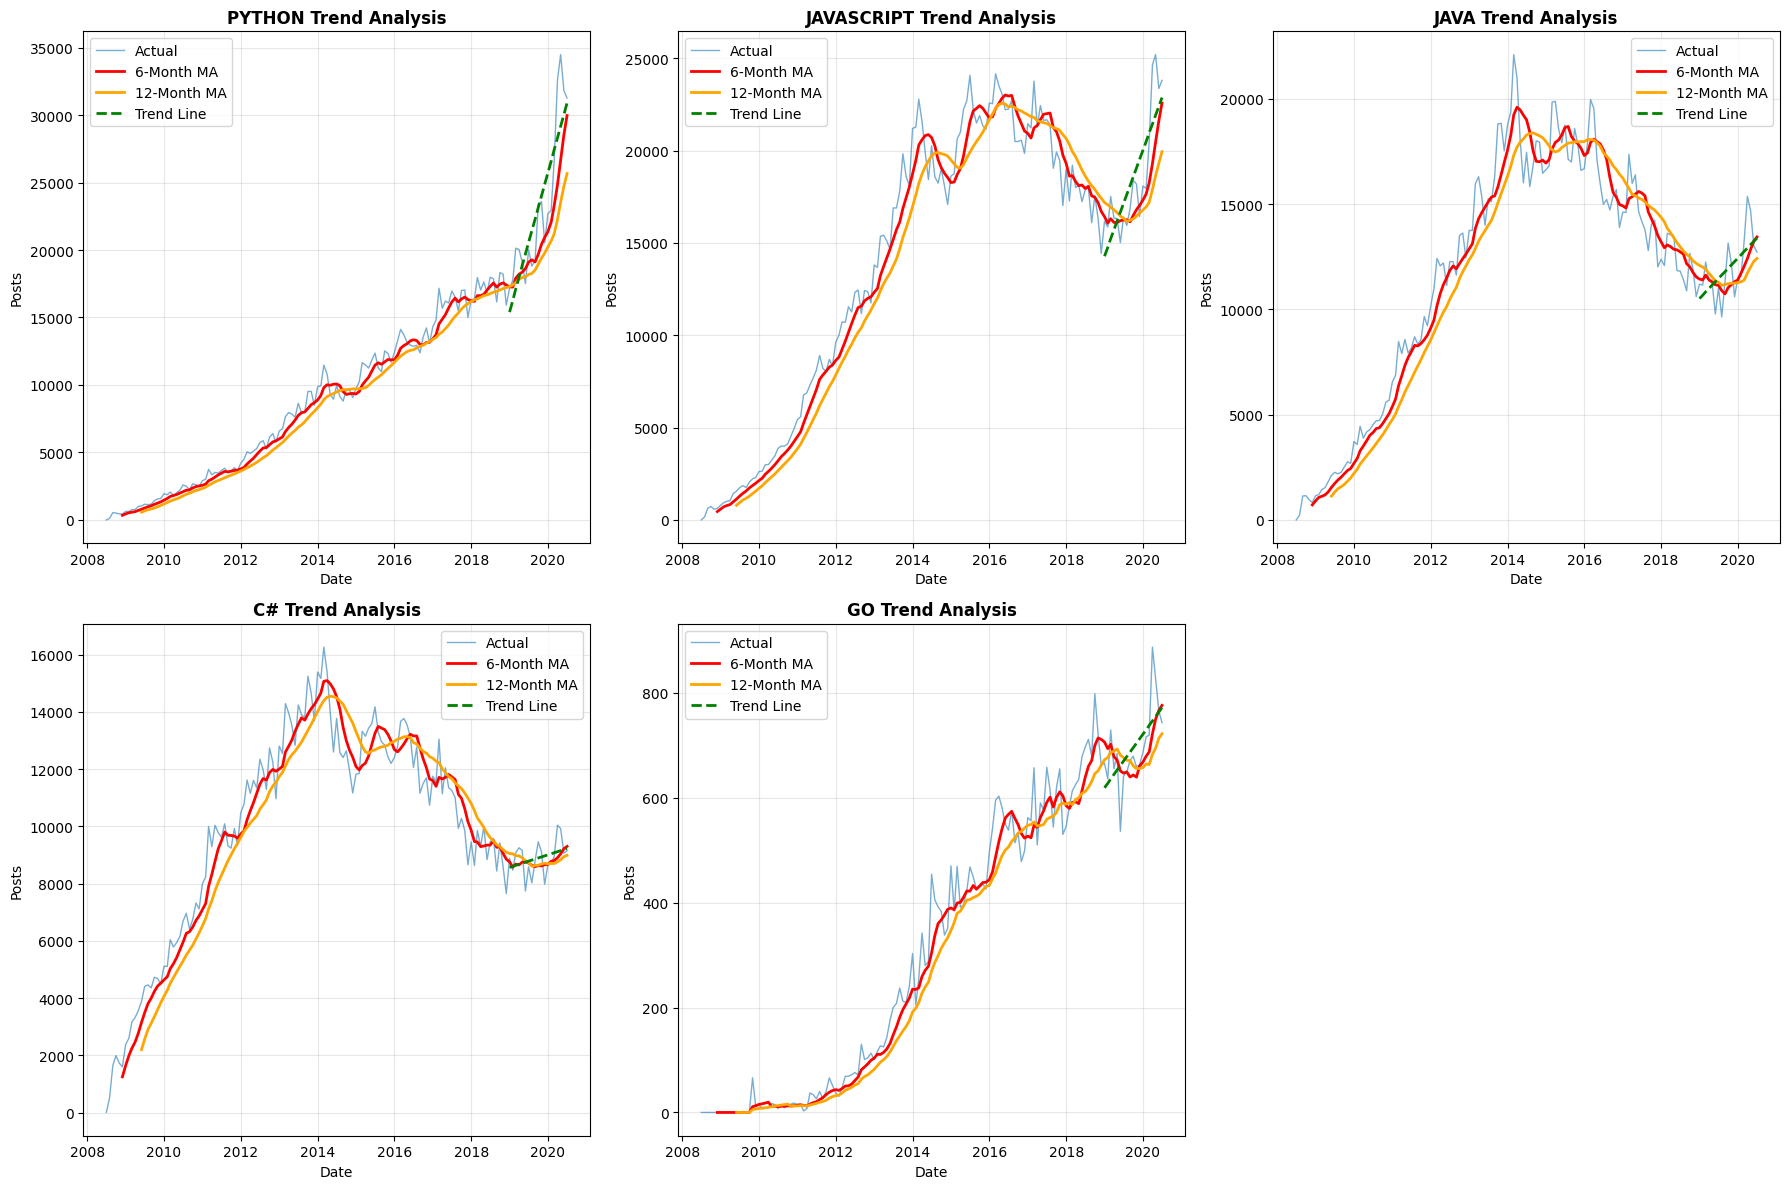

In [44]:
## 8. Trend Analysis and Forecasting

def analyze_trends_with_forecasting(pivoted_df, languages=None, window=12):
    """Enhanced trend analysis with simple forecasting techniques"""
    if languages is None:
        languages = ['python', 'javascript', 'java', 'c#', 'go']

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()

    trend_insights = {}

    for i, language in enumerate(languages[:6]):
        if language in pivoted_df.columns:
            data = pivoted_df[language]

            ma_6 = data.rolling(window=6).mean()
            ma_12 = data.rolling(window=12).mean()

            # Simple linear trend for last 2 years
            recent_data = data.last('2Y')
            if len(recent_data) > 1:
                x = np.arange(len(recent_data))
                slope, intercept = np.polyfit(x, recent_data.values, 1)
                trend_line = slope * x + intercept

                # Calculate growth metrics
                growth_1y = (recent_data.iloc[-1] / recent_data.iloc[0] - 1) * 100

                trend_insights[language] = {
                    'current_trend': slope,
                    'growth_1y': growth_1y,
                    'volatility': data.std()
                }

            # Plotting
            axes[i].plot(data.index, data, label='Actual', alpha=0.6, linewidth=1)
            axes[i].plot(ma_6.index, ma_6, label='6-Month MA', linewidth=2, color='red')
            axes[i].plot(ma_12.index, ma_12, label='12-Month MA', linewidth=2, color='orange')

            if len(recent_data) > 1:
                axes[i].plot(recent_data.index, trend_line, '--', label='Trend Line', linewidth=2, color='green')

            axes[i].set_title(f'{language.upper()} Trend Analysis', fontweight='bold')
            axes[i].set_xlabel('Date')
            axes[i].set_ylabel('Posts')
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)

    # Remove empty subplots
    for i in range(len(languages), 6):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

    return trend_insights

# Execute trend analysis
print("Performing advanced trend analysis...")
trend_results = analyze_trends_with_forecasting(pivoted_df)



##Conclusion
This analysis provides valuable insights into programming language trends over more than a decade. The data reveals:

Long-term trends in language adoption and decline

Seasonal patterns in developer engagement

Market share dynamics between competing technologies

Growth trajectories that can inform learning and career decisions